<a href="https://colab.research.google.com/github/BeforeTheStorm202/DACN/blob/main/RF_GAN_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [3]:
import seaborn as sns
import pandas as pd
# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
def evaluation(y_test, y_pred):
  print('Misclassified samples: %d' % (y_test != y_pred).sum())
  result = confusion_matrix(y_test, y_pred, normalize='true')
  print("Confusion Matrix:")
  print(result)
  sns.heatmap(result, annot=True)
  #result1 = classification_report(y_test, y_pred)
  #print("Classification Report:",)
  #print (result1)
  result2 = 100* accuracy_score(y_test, y_pred)
  print("Accuracy:", result2)
  result3 = precision_score(y_test, y_pred, average='macro')
  print("Precision:",result3)
  result4 = recall_score(y_test, y_pred, average='macro')
  print("Recall:",result4)
  result5 = f1_score(y_test, y_pred, average='macro')
  print("F1:",result5)
  #result6 = roc_auc_score(y_test, y_pred, multi_class='ovo')
  #print("AUC:",result6)

# Load model & adv sample dataset(s)

In [4]:
import joblib
# load
model = joblib.load("/content/drive/MyDrive/DACN_XAI_Adv_defense/InSDN/random_forest_smote.joblib")

In [5]:
feature_list = ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
       'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s',
       'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len',
       'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min',
       'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
       'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt',
       'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt',
       'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
       'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg',
       'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts',
       'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts',
       'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std',
       'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max',
       'Idle Min']

## HSJ

In [6]:
hsj_df = pd.read_csv('/content/drive/MyDrive/DACN_XAI_Adv_defense/Dataset/insdn/adv/hsj/adv_hsj_target.csv')

In [7]:
hsj_df.columns = feature_list
hsj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77203 entries, 0 to 77202
Data columns (total 76 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flow Duration      77203 non-null  float64
 1   Tot Fwd Pkts       77203 non-null  float64
 2   Tot Bwd Pkts       77203 non-null  float64
 3   TotLen Fwd Pkts    77203 non-null  float64
 4   TotLen Bwd Pkts    77203 non-null  float64
 5   Fwd Pkt Len Max    77203 non-null  float64
 6   Fwd Pkt Len Min    77203 non-null  float64
 7   Fwd Pkt Len Mean   77203 non-null  float64
 8   Fwd Pkt Len Std    77203 non-null  float64
 9   Bwd Pkt Len Max    77203 non-null  float64
 10  Bwd Pkt Len Min    77203 non-null  float64
 11  Bwd Pkt Len Mean   77203 non-null  float64
 12  Bwd Pkt Len Std    77203 non-null  float64
 13  Flow Byts/s        77203 non-null  float64
 14  Flow Pkts/s        77203 non-null  float64
 15  Flow IAT Mean      77203 non-null  float64
 16  Flow IAT Std       772

In [11]:
hsj_label_df = pd.read_csv('/content/drive/MyDrive/DACN_XAI_Adv_defense/Dataset/insdn/multi/test.csv')

In [12]:
hsj_label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96289 entries, 0 to 96288
Data columns (total 77 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flow Duration      96289 non-null  float64
 1   Tot Fwd Pkts       96289 non-null  float64
 2   Tot Bwd Pkts       96289 non-null  float64
 3   TotLen Fwd Pkts    96289 non-null  float64
 4   TotLen Bwd Pkts    96289 non-null  float64
 5   Fwd Pkt Len Max    96289 non-null  float64
 6   Fwd Pkt Len Min    96289 non-null  float64
 7   Fwd Pkt Len Mean   96289 non-null  float64
 8   Fwd Pkt Len Std    96289 non-null  float64
 9   Bwd Pkt Len Max    96289 non-null  float64
 10  Bwd Pkt Len Min    96289 non-null  float64
 11  Bwd Pkt Len Mean   96289 non-null  float64
 12  Bwd Pkt Len Std    96289 non-null  float64
 13  Flow Byts/s        96289 non-null  float64
 14  Flow Pkts/s        96289 non-null  float64
 15  Flow IAT Mean      96289 non-null  float64
 16  Flow IAT Std       962

In [16]:
hsj_label = hsj_label_df[hsj_label_df['Label'] != 0]
hsj_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77203 entries, 0 to 96288
Data columns (total 77 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flow Duration      77203 non-null  float64
 1   Tot Fwd Pkts       77203 non-null  float64
 2   Tot Bwd Pkts       77203 non-null  float64
 3   TotLen Fwd Pkts    77203 non-null  float64
 4   TotLen Bwd Pkts    77203 non-null  float64
 5   Fwd Pkt Len Max    77203 non-null  float64
 6   Fwd Pkt Len Min    77203 non-null  float64
 7   Fwd Pkt Len Mean   77203 non-null  float64
 8   Fwd Pkt Len Std    77203 non-null  float64
 9   Bwd Pkt Len Max    77203 non-null  float64
 10  Bwd Pkt Len Min    77203 non-null  float64
 11  Bwd Pkt Len Mean   77203 non-null  float64
 12  Bwd Pkt Len Std    77203 non-null  float64
 13  Flow Byts/s        77203 non-null  float64
 14  Flow Pkts/s        77203 non-null  float64
 15  Flow IAT Mean      77203 non-null  float64
 16  Flow IAT Std       772

In [21]:
hsj_label = hsj_label['Label']
hsj_label.info()

<class 'pandas.core.series.Series'>
Int64Index: 77203 entries, 0 to 96288
Series name: Label
Non-Null Count  Dtype
--------------  -----
77203 non-null  int64
dtypes: int64(1)
memory usage: 1.2 MB


In [8]:
y_pred = model.predict(hsj_df)

Misclassified samples: 76202
Confusion Matrix:
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.86293939e-01 1.08491248e-04 3.61637495e-05 1.26211486e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 9.40257486e-04]
 [9.96282745e-01 8.78091614e-05 2.92697205e-05 3.60017562e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.39406153e-01 6.71772135e-05 0.00000000e+00 6.03251377e-02
  0.00000000e+00 6.71772135e-05 0.00000000e+00 1.34354427e-04]
 [7.04714640e-01 0.00000000e+00 0.00000000e+00 4.71464020e-02
  2.43176179e-01 0.00000000e+00 0.00000000e+00 4.96277916e-03]
 [6.97674419e-01 0.00000000e+00 0.00000000e+00 2.79069767e-01
  0.00000000e+00 2.32558140e-02 0.00000000e+00 0.00000000e+00]
 [8.51063830e-01 0.00000000e+00 0.00000000e+00 1.48936170e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.38329443993506496
Recall: 0.040861861411959056
F1: 0.06827026193397256


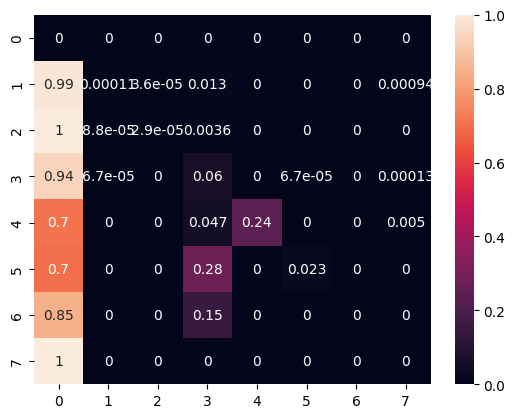

In [22]:
evaluation(hsj_label, y_pred)

## PGD

In [23]:
pgd_df = pd.read_csv('/content/drive/MyDrive/DACN_XAI_Adv_defense/Dataset/insdn/adv/pgd/adv_pgd_multi_target.csv')
pgd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77203 entries, 0 to 77202
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       77203 non-null  float64
 1   1       77203 non-null  float64
 2   2       77203 non-null  float64
 3   3       77203 non-null  float64
 4   4       77203 non-null  float64
 5   5       77203 non-null  float64
 6   6       77203 non-null  float64
 7   7       77203 non-null  float64
 8   8       77203 non-null  float64
 9   9       77203 non-null  float64
 10  10      77203 non-null  float64
 11  11      77203 non-null  float64
 12  12      77203 non-null  float64
 13  13      77203 non-null  float64
 14  14      77203 non-null  float64
 15  15      77203 non-null  float64
 16  16      77203 non-null  float64
 17  17      77203 non-null  float64
 18  18      77203 non-null  float64
 19  19      77203 non-null  float64
 20  20      77203 non-null  float64
 21  21      77203 non-null  float64
 22

In [24]:
pgd_df.columns = feature_list
pgd_label = hsj_label
pgd_label.info()

<class 'pandas.core.series.Series'>
Int64Index: 77203 entries, 0 to 96288
Series name: Label
Non-Null Count  Dtype
--------------  -----
77203 non-null  int64
dtypes: int64(1)
memory usage: 1.2 MB


In [25]:
y_pred2 = model.predict(pgd_df)

Misclassified samples: 76478
Confusion Matrix:
[[0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.99855345 0.         0.         0.00144655 0.         0.
  0.         0.        ]
 [0.88777989 0.09155569 0.02066442 0.         0.         0.
  0.         0.        ]
 [0.99872363 0.         0.         0.00127637 0.         0.
  0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         0.        ]]
Accuracy: 0.9390826781342694
Precision: 0.1652542372881356
Recall: 0.002742598713882269
F1: 0.005379344482386494


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


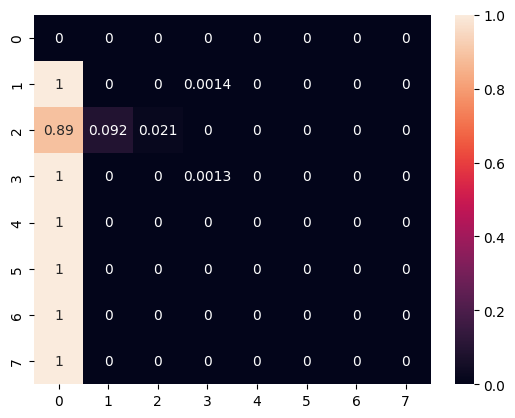

In [26]:
evaluation(pgd_label, y_pred2)

## FGSM

In [27]:
fgsm_df = pd.read_csv('/content/drive/MyDrive/DACN_XAI_Adv_defense/Dataset/insdn/adv/fgsm/adv_fgsm_multi_target.csv')
fgsm_df.columns = feature_list
fgsm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77203 entries, 0 to 77202
Data columns (total 76 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flow Duration      77203 non-null  float64
 1   Tot Fwd Pkts       77203 non-null  float64
 2   Tot Bwd Pkts       77203 non-null  float64
 3   TotLen Fwd Pkts    77203 non-null  float64
 4   TotLen Bwd Pkts    77203 non-null  float64
 5   Fwd Pkt Len Max    77203 non-null  float64
 6   Fwd Pkt Len Min    77203 non-null  float64
 7   Fwd Pkt Len Mean   77203 non-null  float64
 8   Fwd Pkt Len Std    77203 non-null  float64
 9   Bwd Pkt Len Max    77203 non-null  float64
 10  Bwd Pkt Len Min    77203 non-null  float64
 11  Bwd Pkt Len Mean   77203 non-null  float64
 12  Bwd Pkt Len Std    77203 non-null  float64
 13  Flow Byts/s        77203 non-null  float64
 14  Flow Pkts/s        77203 non-null  float64
 15  Flow IAT Mean      77203 non-null  float64
 16  Flow IAT Std       772

In [28]:
fgsm_label = hsj_label
fgsm_label.info()

<class 'pandas.core.series.Series'>
Int64Index: 77203 entries, 0 to 96288
Series name: Label
Non-Null Count  Dtype
--------------  -----
77203 non-null  int64
dtypes: int64(1)
memory usage: 1.2 MB


In [29]:
y_pred3 = model.predict(fgsm_df)

Misclassified samples: 71494
Confusion Matrix:
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.25864314e-01 2.89309996e-04 7.36655576e-02 1.80818747e-04
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.37816479e-01 0.00000000e+00 1.62154251e-01 2.92697205e-05
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.73935241e-01 4.09781002e-03 1.11514174e-02 1.08155314e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.71712159e-01 1.56327543e-01 1.24069479e-02 5.95533499e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.20930233e-01 0.00000000e+00 4.65116279e-02 2.32558140e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.72340426e-01 0.00000000e+00 0.00000000e+00 1.27659574e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.57142857e-01 1.42857143e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


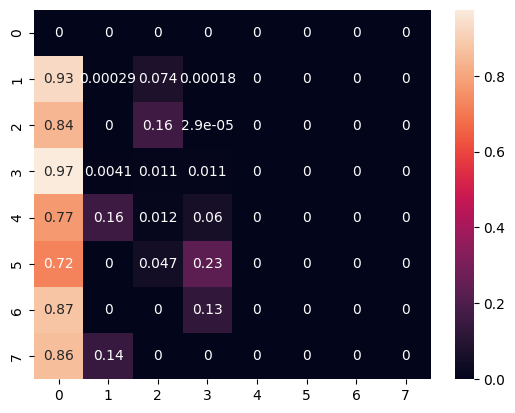

In [30]:
evaluation(fgsm_label, y_pred3)